In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import warnings

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Parameters

In [14]:
# The filtering based on hotspots.
# filter_version = 'including'  # 'including', 'excluding', 'only'
list_filter_versions = ['including', 'excluding', 'only']

INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }#[filter_version]

FREQS_PREFIX = {
        'including':'tables/freqs.denovo_indels.', 
        'excluding':'tables/freqs.exclHotspots.', 
        'only':'tables/freqs.onlyHotspots.' 
    }#[filter_version]


# The 3 species.
list_species = ['mouse','macaque','human']
# The alignment chosen.
alignment = 'chrM'

# Import indels for 3 species and split by mutation type

In [15]:
def get_indels(filter_version):
    # Combine indels for the three species.
    INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{INDEL_PREFIX[filter_version]}{alignment}_{species}.tab' )
        list_df.append( df )
    df_indels = pd.concat(list_df)

    # Classify as Insertion or Deletion.
    df_indels['Mutation_type'] = np.where(
        df_indels['REF'].str.len() > df_indels['ALT'].str.len(), 'Deletion',
        np.where(df_indels['REF'].str.len() < df_indels['ALT'].str.len(), 'Insertion', 'Other')
    )

    # Indel length.
    df_indels['Change_in_length'] = df_indels['ALT'].str.len() - df_indels['REF'].str.len()

    return df_indels



df_indels = get_indels('including')
df_ins = df_indels[df_indels['Mutation_type']=='Insertion'].reset_index(drop=True)
df_dels = df_indels[df_indels['Mutation_type']=='Deletion'].reset_index(drop=True)
df_dels

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Mutation_type,Change_in_length
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,NaN,germline,Germline de novo,12343_AT_A,Unique to Individual,G133p4_12343,non-D-loop,15423,Deletion,-1
1,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,NaN,germline,Germline de novo,14806_CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAA...,Unique to Individual,G133p4_14806,non-D-loop,15423,Deletion,-58
2,chrM,5168,GC,G,SB=2.22361;AF=0.0013986;AC=0,SRR10068710,.:1:0.00145138:2.15552,mouse,1.0,0.001451,...,NaN,germline,Germline de novo,5168_GC_G,Between pedigrees,G133p3_5168,non-D-loop,15423,Deletion,-1
3,chrM,4051,CA,C,SB=2.0693;AF=0.00555556;AC=0,SRR10068711,.:1:0.00104167:2.82163,mouse,1.0,0.001042,...,NaN,somatic,Somatic de novo,4051_CA_C,Between pedigrees,G133p3_4051,non-D-loop,15423,Deletion,-1
4,chrM,5542,CAAT,C,SB=1.49435;AF=0.00047619;AC=0,SRR10068711,.:1:0.00081103:1.49435,mouse,1.0,0.000811,...,NaN,somatic,Somatic de novo,5542_CAAT_C,Between pedigrees,G133p3_5542,non-D-loop,15423,Deletion,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,chrM,635,AC,A,SB=1.66125;AF=0.00546448;AC=0,hs003_Sa,.:1:0.00546448:1.66125,human,1.0,0.005464,...,8805.0,somatic,Somatic de novo,635_AC_A,NaN,hs003_635,non-D-loop,15447,Deletion,-1
1830,chrM,711,CCA,C,SB=2.01403;AF=0.000293686;AC=0,hs012_Oo1,.:1:0.000293686:2.01403,human,1.0,0.000294,...,8881.0,germline,Germline de novo,711_CCA_C,NaN,hs012_711,non-D-loop,15447,Deletion,-2
1831,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,9035.0,germline,Germline de novo,865_ACCCC_A,NaN,hs006_865,non-D-loop,15447,Deletion,-4
1832,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,9130.0,germline,Germline de novo,960_TCCC_T,NaN,hs010_960,non-D-loop,15447,Deletion,-3


# Import annotations and seq depths

In [16]:
def get_annots():
    annots = pd.read_table(f"tables/annotations.seqDepth.{alignment}.txt")
    return annots

annots = get_annots()
annots


,SRR_ID,Sample_ID,Individual,Tissue,Tissue_alt,Species,Age_group,Age,MeanReadDepth,Nucleotides
0,SRR10068699,G133p4_Oo2,G133p4,Oo,Oo2,mouse,Younger,0.083333,143.790061,2343778
1,SRR10068701,G133p4_Oo,G133p4,Oo,Oo,mouse,Younger,0.083333,1627.007669,26520225
2,SRR10068702,G133p4_M,G133p4,M,M,mouse,Younger,0.083333,1146.431288,18686830
3,SRR10068703,G133p4_Br,G133p4,Br,Br,mouse,Younger,0.083333,698.298712,11382269
4,SRR10068705,G133p3_Oo3,G133p3,Oo,Oo3,mouse,Younger,0.083333,116.046564,1891559
...,...,...,...,...,...,...,...,...,...,...
489,hs023_Oo1,hs023_Oo1,hs023,Oo,Oo1,human,Intermediate,33.000000,1959.128734,32460804
490,hs023_Oo2,hs023_Oo2,hs023,Oo,Oo2,human,Intermediate,33.000000,1087.038083,18011134
491,hs023_Oo3,hs023_Oo3,hs023,Oo,Oo3,human,Intermediate,33.000000,2201.843020,36482337
492,hs023_Oo4,hs023_Oo4,hs023,Oo,Oo4,human,Intermediate,33.000000,1130.984127,18739276


# Compute mutation frequencies by individual

In [17]:
def get_indiv_freqs(df_in):
    df_indels = df_in.copy()
    # Species-specific genome size and ranges from species_info
    genome_sizes = {
        'mouse': 16300,
        'macaque': 16564,
        'human': 16569
    }
    # Map genome_size from species_info to the Genome_size column in df_indels
    df_indels['Genome_size'] = df_indels['Species'].map(genome_sizes)

    # Import annotations.
    annots = get_annots()
    # Sum nucleotides per condition (age group, tissue) and individual.
    nucl = annots.groupby(['Species', 'Age_group', 'Tissue', 'Individual'])['Nucleotides'].sum().reset_index(name='Nucleotides_per_tissue')
    
    # Compute the total genome frequencies by grouping by the same columns as the D-loop and non-D-loop frequencies
    no_mutx = df_indels.groupby(['Species', 'Age_group', 'Tissue', 'Individual']).size().reset_index(name='No_mutations')

    # Merge mutations and nucleotides.
    indiv_freqs = pd.merge(nucl,no_mutx, how='left')
    indiv_freqs['No_mutations'] = indiv_freqs['No_mutations'].fillna(0)

    # Ensure `indiv_freqs` has a 'Species' column with values like 'mouse', 'macaque', 'human'
    indiv_freqs['Region_size'] = indiv_freqs['Species'].map(genome_sizes)
    indiv_freqs['Region'] = 'Total'

    # Compute frequency by individual and condition.
    indiv_freqs['Frequency'] = indiv_freqs['No_mutations'] / (indiv_freqs['Nucleotides_per_tissue'])

    # # Drop rows where Frequency is 0
    # indiv_freqs = indiv_freqs[indiv_freqs['Frequency'] != 0]
    
    return indiv_freqs

df_indivs = get_indiv_freqs(df_indels)
df_indivs

,Species,Age_group,Tissue,Individual,Nucleotides_per_tissue,No_mutations,Region_size,Region,Frequency
0,human,Intermediate,Bl,hs021,1073665,0.0,16569,Total,0.000000e+00
1,human,Intermediate,Bl,hs022,4237126,6.0,16569,Total,1.416054e-06
2,human,Intermediate,Oo,hs002,75487881,13.0,16569,Total,1.722131e-07
3,human,Intermediate,Oo,hs014,127144442,6.0,16569,Total,4.719042e-08
4,human,Intermediate,Oo,hs016,37548309,2.0,16569,Total,5.326472e-08
...,...,...,...,...,...,...,...,...,...
237,mouse,Younger,Oo,G137p3,39681520,10.0,16300,Total,2.520065e-07
238,mouse,Younger,Oo,G137p5,8784188,3.0,16300,Total,3.415227e-07
239,mouse,Younger,Oo,G139p1,10572417,2.0,16300,Total,1.891715e-07
240,mouse,Younger,Oo,G140p6,23620269,6.0,16300,Total,2.540191e-07


# Perform tests in individual-level frequencies (Mann-Whitney U)

In [18]:
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection

def perform_statistical_test(df, test_type='MWU', group_cols=['Species', 'Tissue'], count_col='No_mutations', sum_col='Nucleotides', age_group='Age_group', young_label='Younger', old_label='Older', alternative='greater'):
    """
    Perform statistical test (t-test or Mann-Whitney U) between Younger and Older age groups for specified groups.

    Parameters:
        df (pd.DataFrame): Input dataframe containing mutation counts and nucleotide totals.
        test_type (str): Type of test to perform ('t-test' or 'MWU').
        group_cols (list): Columns to group by (e.g., ['Species', 'Tissue']).
        count_col (str): Column with mutation counts.
        sum_col (str): Column with total nucleotide counts.
        age_group (str): Column indicating age group.
        young_label (str): Label for the younger age group.
        old_label (str): Label for the older age group.
        alternative (str): Direction for the test ('greater', 'less', or 'two-sided').

    Returns:
        pd.DataFrame: A dataframe with test results.
    """
    test_results = []

    # Group data by specified columns
    for group_values, group_data in df.groupby(group_cols, observed=False):
        # Subset data for Younger and Older age groups
        younger = group_data[group_data[age_group] == young_label]
        older = group_data[group_data[age_group] == old_label]
        
        # Ensure both age groups are present
        if not younger.empty and not older.empty:
            # Extract frequencies
            younger_freqs = younger['Frequency'].values
            older_freqs = older['Frequency'].values
            
            # Perform the specified test
            if test_type == 't-test':
                stat, p_value = ttest_ind(older_freqs, younger_freqs, alternative=alternative)
            elif test_type == 'MWU':
                stat, p_value = mannwhitneyu(older_freqs, younger_freqs, alternative=alternative)
            else:
                raise ValueError("Invalid test_type. Choose 't-test' or 'MWU'.")
            
            # Prepare result row
            result = dict(zip(group_cols, group_values))
            result.update({'P_value': p_value, 'Mean_freq_younger':younger_freqs.mean(), 'Mean_freq_older':older_freqs.mean()})
            test_results.append(result)

    # Convert results to a DataFrame
    results = pd.DataFrame(test_results)
    # Add stars to p-values.
    results = assign_p_value_stars(results)
    # Calculate fold difference of Frequency between Younger and Older age groups
    results['Fold_difference'] = results['Mean_freq_older'] / results['Mean_freq_younger']
    # Drop macaque Ht and mouse Li.
    results = results[~((results['Species'] == 'macaque') & (results['Tissue'] == 'Ht'))]
    results = results[~((results['Species'] == 'mouse') & (results['Tissue'] == 'Li'))]
    # Sort values.
    results = results.sort_values(['Species','Tissue'], ascending=[False,False])
    # Switch penultimate row with antepenultimate one
    if len(results) > 2:
        penultimate_idx = -2
        antepenultimate_idx = -3
        results.iloc[penultimate_idx], results.iloc[antepenultimate_idx] = results.iloc[antepenultimate_idx].copy(), results.iloc[penultimate_idx].copy()
    # Melt the dataframe to have Age_group and Frequency columns
    results = results.melt(id_vars=group_cols + ['P_value', 'Stars', 'Fold_difference'], 
                           value_vars=['Mean_freq_younger', 'Mean_freq_older'], 
                           var_name='Age_group', 
                           value_name='Frequency')
    # Map the melted Age_group column to 'Younger' and 'Older'
    results['Age_group'] = results['Age_group'].map({'Mean_freq_younger': 'Younger', 'Mean_freq_older': 'Older'})
    # Reorganize columns.
    results = results[group_cols + ['Age_group','Frequency'] + ['Fold_difference','P_value', 'Stars']]
    # Apply FDR correction to the p-values
    results['FDR_reject'] ,results['FDR_corrected_P_value']= fdrcorrection(results['P_value'])
    # Add back the Age group values that are not Younger or Older groups
    intermediate_groups = df[df[age_group].isin(['Intermediate', 'Interm_1', 'Interm_2'])]
    if not intermediate_groups.empty:
        intermediate_results = intermediate_groups.groupby(group_cols + [age_group]).agg(
            Frequency=('Frequency', 'mean')
        ).reset_index()
        intermediate_results['Fold_difference'] = '.'
        intermediate_results['P_value'] = '.'
        intermediate_results['Stars'] = '.'
        intermediate_results['FDR_reject'] = '.'
        intermediate_results['FDR_corrected_P_value'] = '.'
        results = pd.concat([results, intermediate_results], ignore_index=True)
    dict_tissues =  { 'mouse':['Oo', 'M', 'Br'], 'macaque':['Oo', 'M', 'Li'], 'human':['Oo', 'Sa', 'Bl'] } # Dictionary of tissues per species.
    for species in list_species:
        for tissue in dict_tissues[species]:
            for age_group in results[(results['Species']==species)&(results['Age_group'].str.contains('Int'))]['Age_group'].unique():
                # Find the values for the other age groups
                human_blood_other = results[(results['Species'] == species) & (results['Tissue'] == tissue) & (results['Age_group'] != age_group)& (~results['Age_group'].str.contains('Int'))].iloc[0]
                # Update the values for intermediate
                results.loc[(results['Species'] == species) & (results['Tissue'] == tissue) & (results['Age_group'] == age_group), ['Fold_difference', 'P_value', 'Stars', 'FDR_reject','FDR_corrected_P_value']] = human_blood_other[['Fold_difference', 'P_value', 'Stars', 'FDR_reject', 'FDR_corrected_P_value']].values
    results = results.dropna()
    # Drop macaque Ht
    results = results[~((results['Species'] == 'macaque') & (results['Tissue'] == 'Ht'))]
    # Sort.
    results = results.sort_values(['Species','Tissue','Age_group'])
    return results


def assign_p_value_stars(df, p_value_col='P_value', thresholds=[0.001, 0.01, 0.05], stars=["***", "**", "*", "ns"]):
    """
    Assign stars based on p-value significance levels.
    """
    # Ensure thresholds and stars are aligned
    if len(stars) != len(thresholds) + 1:
        raise ValueError("The length of `stars` must be one greater than `thresholds`.")
    # Function to assign stars based on p-value
    def get_stars(p):
        for i, threshold in enumerate(thresholds):
            if p <= threshold:
                return stars[i]
        return stars[-1]  # No significance
    
    # Apply the star assignment function to the p_value column
    df['Stars'] = df[p_value_col].apply(get_stars)
    return df

perform_statistical_test(df_indivs)

,Species,Tissue,Age_group,Frequency,Fold_difference,P_value,Stars,FDR_reject,FDR_corrected_P_value
18,human,Bl,Intermediate,7.080271e-07,0.500658,0.795824,ns,False,0.895302
17,human,Bl,Older,2.949440e-07,0.500658,0.795824,ns,False,0.895302
8,human,Bl,Younger,5.891122e-07,0.500658,0.795824,ns,False,0.895302
19,human,Oo,Intermediate,7.243724e-08,0.68121,0.479565,ns,False,0.719347
15,human,Oo,Older,1.027564e-07,0.68121,0.479565,ns,False,0.719347
6,human,Oo,Younger,1.508440e-07,0.68121,0.479565,ns,False,0.719347
20,human,Sa,Intermediate,1.133746e-06,0.865826,0.597134,ns,False,0.767743
16,human,Sa,Older,4.624791e-07,0.865826,0.597134,ns,False,0.767743
7,human,Sa,Younger,5.341480e-07,0.865826,0.597134,ns,False,0.767743
22,macaque,Li,Interm_1,6.822019e-07,4.296091,0.000175,***,True,0.000787


# Table for each filter version

In [19]:
def get_table(filter_version):
    # Get indels.
    indels = get_indels(filter_version)
    list_dfs = []
    for mut_type in ['Deletion','Insertion']:
        # Get frequencies and test.
        mutations = indels[indels['Mutation_type']==mut_type]
        freqs = get_indiv_freqs(mutations)
        results = perform_statistical_test(freqs)
        # Aesthetics.
        # results['Species'] = results['Species'].str.capitalize()
        # dict_tissue_names = {'Oo':'Oocytes','M':'Skeletal muscle','Br':'Brain',
        #             'Li':'Liver','Sa':'Saliva','Bl':'Blood'}
        # results['Tissue'] = results['Tissue'].map(dict_tissue_names)
        results = results.drop('FDR_reject', axis=1)
        # results = results.rename(columns={ 'Age_group':'Age_group', 'Fold_difference':'Fold difference (Older/Younger)', 'P_value':'p-value (1-sided)', 'Stars':'Significance', 'FDR_corrected_P_value':'FDR-corr p-value (1-sided)' })
        # Add mutation_type info.
        results['Mutation_type'] = mut_type
        # Move Mutation_type column to the third position
        cols = results.columns.tolist()
        cols.insert(2, cols.pop(cols.index('Mutation_type')))
        results = results[cols]
        # Keep iteration data.
        list_dfs.append(results)
    # Join results for both mutation types.
    results = pd.concat(list_dfs)
    # Sort.
    results = results.sort_values(['Species','Tissue','Mutation_type','Age_group'],ascending=[False,True,True,True])
    # results['p-value (1-sided)'] = results['p-value (1-sided)'].astype(float)
    # results['FDR-corr p-value (1-sided)'] = results['p-value (1-sided)'].astype(float)
    return results

table_a = get_table('including')
table_b = get_table('excluding')
table_c = get_table('only')

table_a

,Species,Tissue,Mutation_type,Age_group,Frequency,Fold_difference,P_value,Stars,FDR_corrected_P_value
11,mouse,Br,Deletion,Older,3.058109e-07,4.487623,0.00002,***,0.000176
2,mouse,Br,Deletion,Younger,6.814541e-08,4.487623,0.00002,***,0.000176
11,mouse,Br,Insertion,Older,5.767774e-08,1.23309,0.416234,ns,0.642857
2,mouse,Br,Insertion,Younger,4.677496e-08,1.23309,0.416234,ns,0.642857
10,mouse,M,Deletion,Older,3.066718e-07,3.073885,0.001659,**,0.004978
1,mouse,M,Deletion,Younger,9.976686e-08,3.073885,0.001659,**,0.004978
10,mouse,M,Insertion,Older,6.722221e-08,1.218486,0.371414,ns,0.642857
1,mouse,M,Insertion,Younger,5.516864e-08,1.218486,0.371414,ns,0.642857
9,mouse,Oo,Deletion,Older,1.644008e-07,1.305303,0.068326,ns,0.122988
0,mouse,Oo,Deletion,Younger,1.259484e-07,1.305303,0.068326,ns,0.122988


# Boxplot of insertion and deletions

In [20]:
def plot_by_individual_paired_dels_ins_v3(write=True):
    list_species = ['mouse','macaque','human']
    list_filterVersions = [ 'including', 'excluding', 'only' ]

    # Text size (font size) and plot style.
    sns.set(font_scale=2.9)
    plt.style.use('seaborn-v0_8-white')
    #plt.style.use('ggplot')
    
    # Setting the dimensions of the plot.
    fig, axes = plt.subplots(3,3,figsize=(40,35),sharey=False)
    
    # Adjust space between subplots.
    fig.subplots_adjust(hspace = 0.07, wspace=0.07)

    for y,filter_version in enumerate(list_filterVersions):
        # Get indels.
        indels = get_indels(filter_version)
        list_dfs = []
        for mut_type in ['Deletion','Insertion']:
            mutations = indels[indels['Mutation_type']==mut_type]
            df_iter = get_indiv_freqs(mutations)
            df_iter['Mutation_type'] = mut_type
            list_dfs.append(df_iter)
        df_freqs = pd.concat(list_dfs)
        
        # Change power value of frequencies (Get rid of "1e10-7" in the plot).
        power_value = 7
        #power_value = abs(np.log10(max(df_freqs['Frequency'])).round())
        df_freqs['Frequency'] = df_freqs['Frequency'] * 10**power_value
        
        # Make label for plotting.
        df_freqs['Plot_label'] = df_freqs['Species'] +'_'+ df_freqs['Tissue'] +'_'+ df_freqs['Age_group'] +'_'+ df_freqs['Mutation_type'] 
        # Order each label.
        custom_order_mou = ['mouse_Oo_Younger_Deletion','mouse_Oo_Younger_Insertion',
                            'mouse_Oo_Older_Deletion','mouse_Oo_Older_Insertion',
                            '',
                            'mouse_M_Younger_Deletion','mouse_M_Younger_Insertion',
                            'mouse_M_Older_Deletion','mouse_M_Older_Insertion',
                            ' ',
                            'mouse_Br_Younger_Deletion','mouse_Br_Younger_Insertion',
                            'mouse_Br_Older_Deletion','mouse_Br_Older_Insertion']
                            
        custom_order_mac = ['macaque_Oo_Younger_Deletion','macaque_Oo_Younger_Insertion',
                            'macaque_Oo_Older_Deletion','macaque_Oo_Older_Insertion',
                            '',
                            'macaque_M_Younger_Deletion','macaque_M_Younger_Insertion',
                            'macaque_M_Older_Deletion','macaque_M_Older_Insertion',
                            ' ',
                            'macaque_Li_Younger_Deletion','macaque_Li_Younger_Insertion',
                            'macaque_Li_Older_Deletion','macaque_Li_Older_Insertion']
    
        custom_order_hum = ['human_Oo_Younger_Deletion','human_Oo_Younger_Insertion',
                            'human_Oo_Older_Deletion','human_Oo_Older_Insertion',
                            '',
                            'human_Sa_Younger_Deletion','human_Sa_Younger_Insertion',
                            'human_Sa_Older_Deletion','human_Sa_Older_Insertion',
                            ' ',
                            'human_Bl_Younger_Deletion','human_Bl_Younger_Insertion',
                            'human_Bl_Older_Deletion','human_Bl_Older_Insertion',]
        
        # Custom palette.
        custom_palette = ['#d7301f', '#bdd7e7','#d7301f','#bdd7e7',
                          '#FFFF',
                          '#d7301f', '#bdd7e7','#d7301f','#bdd7e7',
                          '#FFFF',
                          '#d7301f', '#bdd7e7','#d7301f','#bdd7e7'] #Alternating red and blue
        
        # Filter by species.
        def get_species(df,species):
            return df[df['Species']==species].reset_index(drop=True)
    
        # Exclude Intermediate groups for macaques and humans.
        df_mac = get_species(df_freqs,"macaque")
        df_mac = df_mac.loc[~df_mac['Age_group'].str.contains('Interm')]
        df_hum = get_species(df_freqs,"human")
        df_hum = df_hum.loc[~df_hum['Age_group'].str.contains('Interm')]

        # BOX PLOT.
        sns.boxplot( ax = axes[0,y], data = get_species(df_freqs,"mouse"), x = 'Plot_label', y = 'Frequency',
                    order = custom_order_mou, palette = custom_palette, width=1, linewidth=2, fliersize=0, gap=0.0 ) 
        sns.boxplot( ax = axes[1,y], data = df_mac, x = 'Plot_label', y = 'Frequency',
                    order = custom_order_mac, palette = custom_palette, width=1, linewidth=2, fliersize=0, gap=0.0  ) 
        sns.boxplot( ax = axes[2,y], data = df_hum, x = 'Plot_label', y = 'Frequency',
                    order = custom_order_hum, palette = custom_palette, width=1, linewidth=2, fliersize=0, gap=0.0  )
    
        # Add hatches (stripes) to boxplots.
        plt.rcParams['hatch.linewidth'] = 3.0
        for i in [0,1,2,3,4,5,6,7,8]:
            bars = fig.axes[i].patches
            hatches=['//','//',None,None,'//','//',None,None,'//','//',None,None]
            for pat,bar in zip(hatches,bars):
                bar.set_hatch(pat)

        # STRIP PLOT of median indel frequencies.
        marker_size = 55
        df_medians = pd.DataFrame(get_species(df_freqs,'mouse').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[0,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size, marker="_",
                      order = custom_order_mou, color = 'black' )
        df_medians = pd.DataFrame(get_species(df_freqs,'macaque').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[1,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size, marker="_",
                      order = custom_order_mac, color = 'black' )
        df_medians = pd.DataFrame(get_species(df_freqs,'human').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[2,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size, marker="_",
                      order = custom_order_hum, color = 'black' )
        
        # STRIP PLOT of individual frequencies.
        np.random.seed(123)
        dot_size = 10
        sns.stripplot( ax = axes[0,y], data = get_species(df_freqs,'mouse'), x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_mou, palette = custom_palette )
        sns.stripplot( ax = axes[1,y], data = df_mac, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_mac, palette = custom_palette )
        sns.stripplot( ax = axes[2,y], data = df_hum, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_hum, palette = custom_palette )
                
        # STRIP PLOT of mean indel frequencies.
        diamond_size = 16
        df_means = pd.DataFrame(get_species(df_freqs,'mouse').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[0,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                      order = custom_order_mou, palette = custom_palette )
        df_means = pd.DataFrame(get_species(df_freqs,'macaque').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[1,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                      order = custom_order_mac, palette = custom_palette )
        df_means = pd.DataFrame(get_species(df_freqs,'human').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[2,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                      order = custom_order_hum, palette = custom_palette )
    
        # Change y-limits to include space for stat brackets.
        #[ axes[i].set_ylim([-0.3,5.2]) for i in [0,1,2] ]

        # Row-specific ylim values
        row_ylims = {
            0: (-0.2, 6.2),
            1: (-1.1, 39),
            2: (-0.5, 14)
        }
        for i, row in enumerate(range(3)):
            for j, col in enumerate(range(3)):
                ax = axes[i, j]
                ax.set_ylim(row_ylims[i])
                if j > 0:
                    ax.set_ylabel("")  # Remove redundant y-axis labels for better clarity
                    ax.set_yticklabels([])

        axes[0,y].set_xlabel('')
        axes[1,y].set_xlabel('')
        axes[2,y].set_xlabel('')
        
        
        # Change tick labels.
        list_ticklabels_mou = ['','','Oocytes          ','',
                           '',
                           '','','Skeletal muscle          ','',
                           '',
                           '','','Brain          ','']
        list_ticklabels_mac = ['','','Oocytes          ','',
                           '',
                           '','','Skeletal muscle          ','',
                           '',
                           '','','Liver          ','']
        list_ticklabels_hum = ['','','Oocytes          ','',
                           '',
                           '','','Saliva          ','',
                           '',
                           '','','Blood          ','']
                               
        [ axes[i,y].set_xticks(axes[i,y].get_xticks()) for i in [0,1,2] ]
        axes[0,y].set_xticklabels(list_ticklabels_mou, rotation=0)
        axes[1,y].set_xticklabels(list_ticklabels_mac, rotation=0)
        axes[2,y].set_xticklabels(list_ticklabels_hum, rotation=0)
        #plt.xticks(rotation=90)
    
    # Change legend.
    red_patch = mpatches.Patch(color='#d7301f', label='Deletion')
    blue_patch = mpatches.Patch(color='#bdd7e7', label='Insertion')
    blank_patch = mpatches.Patch(color='#FFFFFF', label='')
    slashed_patch = mpatches.Patch( label='Younger',edgecolor='#000000', facecolor='#FFFFFF', hatch='//',)
    white_patch = mpatches.Patch( label='Older',edgecolor='#000000', facecolor='#FFFFFF', hatch=None,)
    axes[0,y].legend(
        handles=[red_patch,blue_patch,blank_patch,slashed_patch,white_patch], 
        bbox_to_anchor=(1, 1)
        )
    
    # Change titles.
    title_size = 45
    axes[1,1].set_title( "Mouse\n", weight='bold', fontsize=title_size, y = 1.5, x = -1.17 - 0.01, rotation = 90)
    axes[1,0].set_title( "Macaque\n", weight='bold', fontsize=title_size, y = 0.35, x = -0.1 - 0.01, rotation = 90)
    axes[2,0].set_title( "Human\n", weight='bold', fontsize=title_size, y = 0.35, x = -0.1 - 0.01, rotation = 90)
    
    # Titles.
    axes[0,0].set_title( f'{list_filterVersions[0].capitalize()} hotspots' , weight='bold', fontsize=title_size, y = 1.01, rotation = 0)
    axes[0,1].set_title( f'{list_filterVersions[1].capitalize()} hotspots' , weight='bold', fontsize=title_size, y = 1.01, rotation = 0)
    axes[0,2].set_title( f'{list_filterVersions[2].capitalize()} hotspots' , weight='bold', fontsize=title_size, y = 1.01, rotation = 0)

    # Change axis labels.
    y=0
    axes[0,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
    axes[1,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
    axes[2,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
    
    plt.show()
    
    # if write:
    #     # Export as vectorized image.
    #     fig.savefig( f'plots/pdf/figure3_freqBoxplots_ins_dels.pdf', bbox_inches='tight', format='pdf', dpi=600)
    #     fig.savefig( f'plots/png/figure3_freqBoxplots_ins_dels.png', bbox_inches='tight', format='png', dpi=600)
   
    return df_freqs


# # Suppress FutureWarnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# plot_by_individual_paired_dels_ins_v3(write=True)

## Boxplot with signif markers

/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_39117/4247873573.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( ax = axes[0,y], data = get_species(df_freqs,"mouse"), x = 'Plot_label', y = 'Frequency',
/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_39117/4247873573.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( ax = axes[1,y], data = df_mac, x = 'Plot_label', y = 'Frequency',
/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_39117/4247873573.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( a

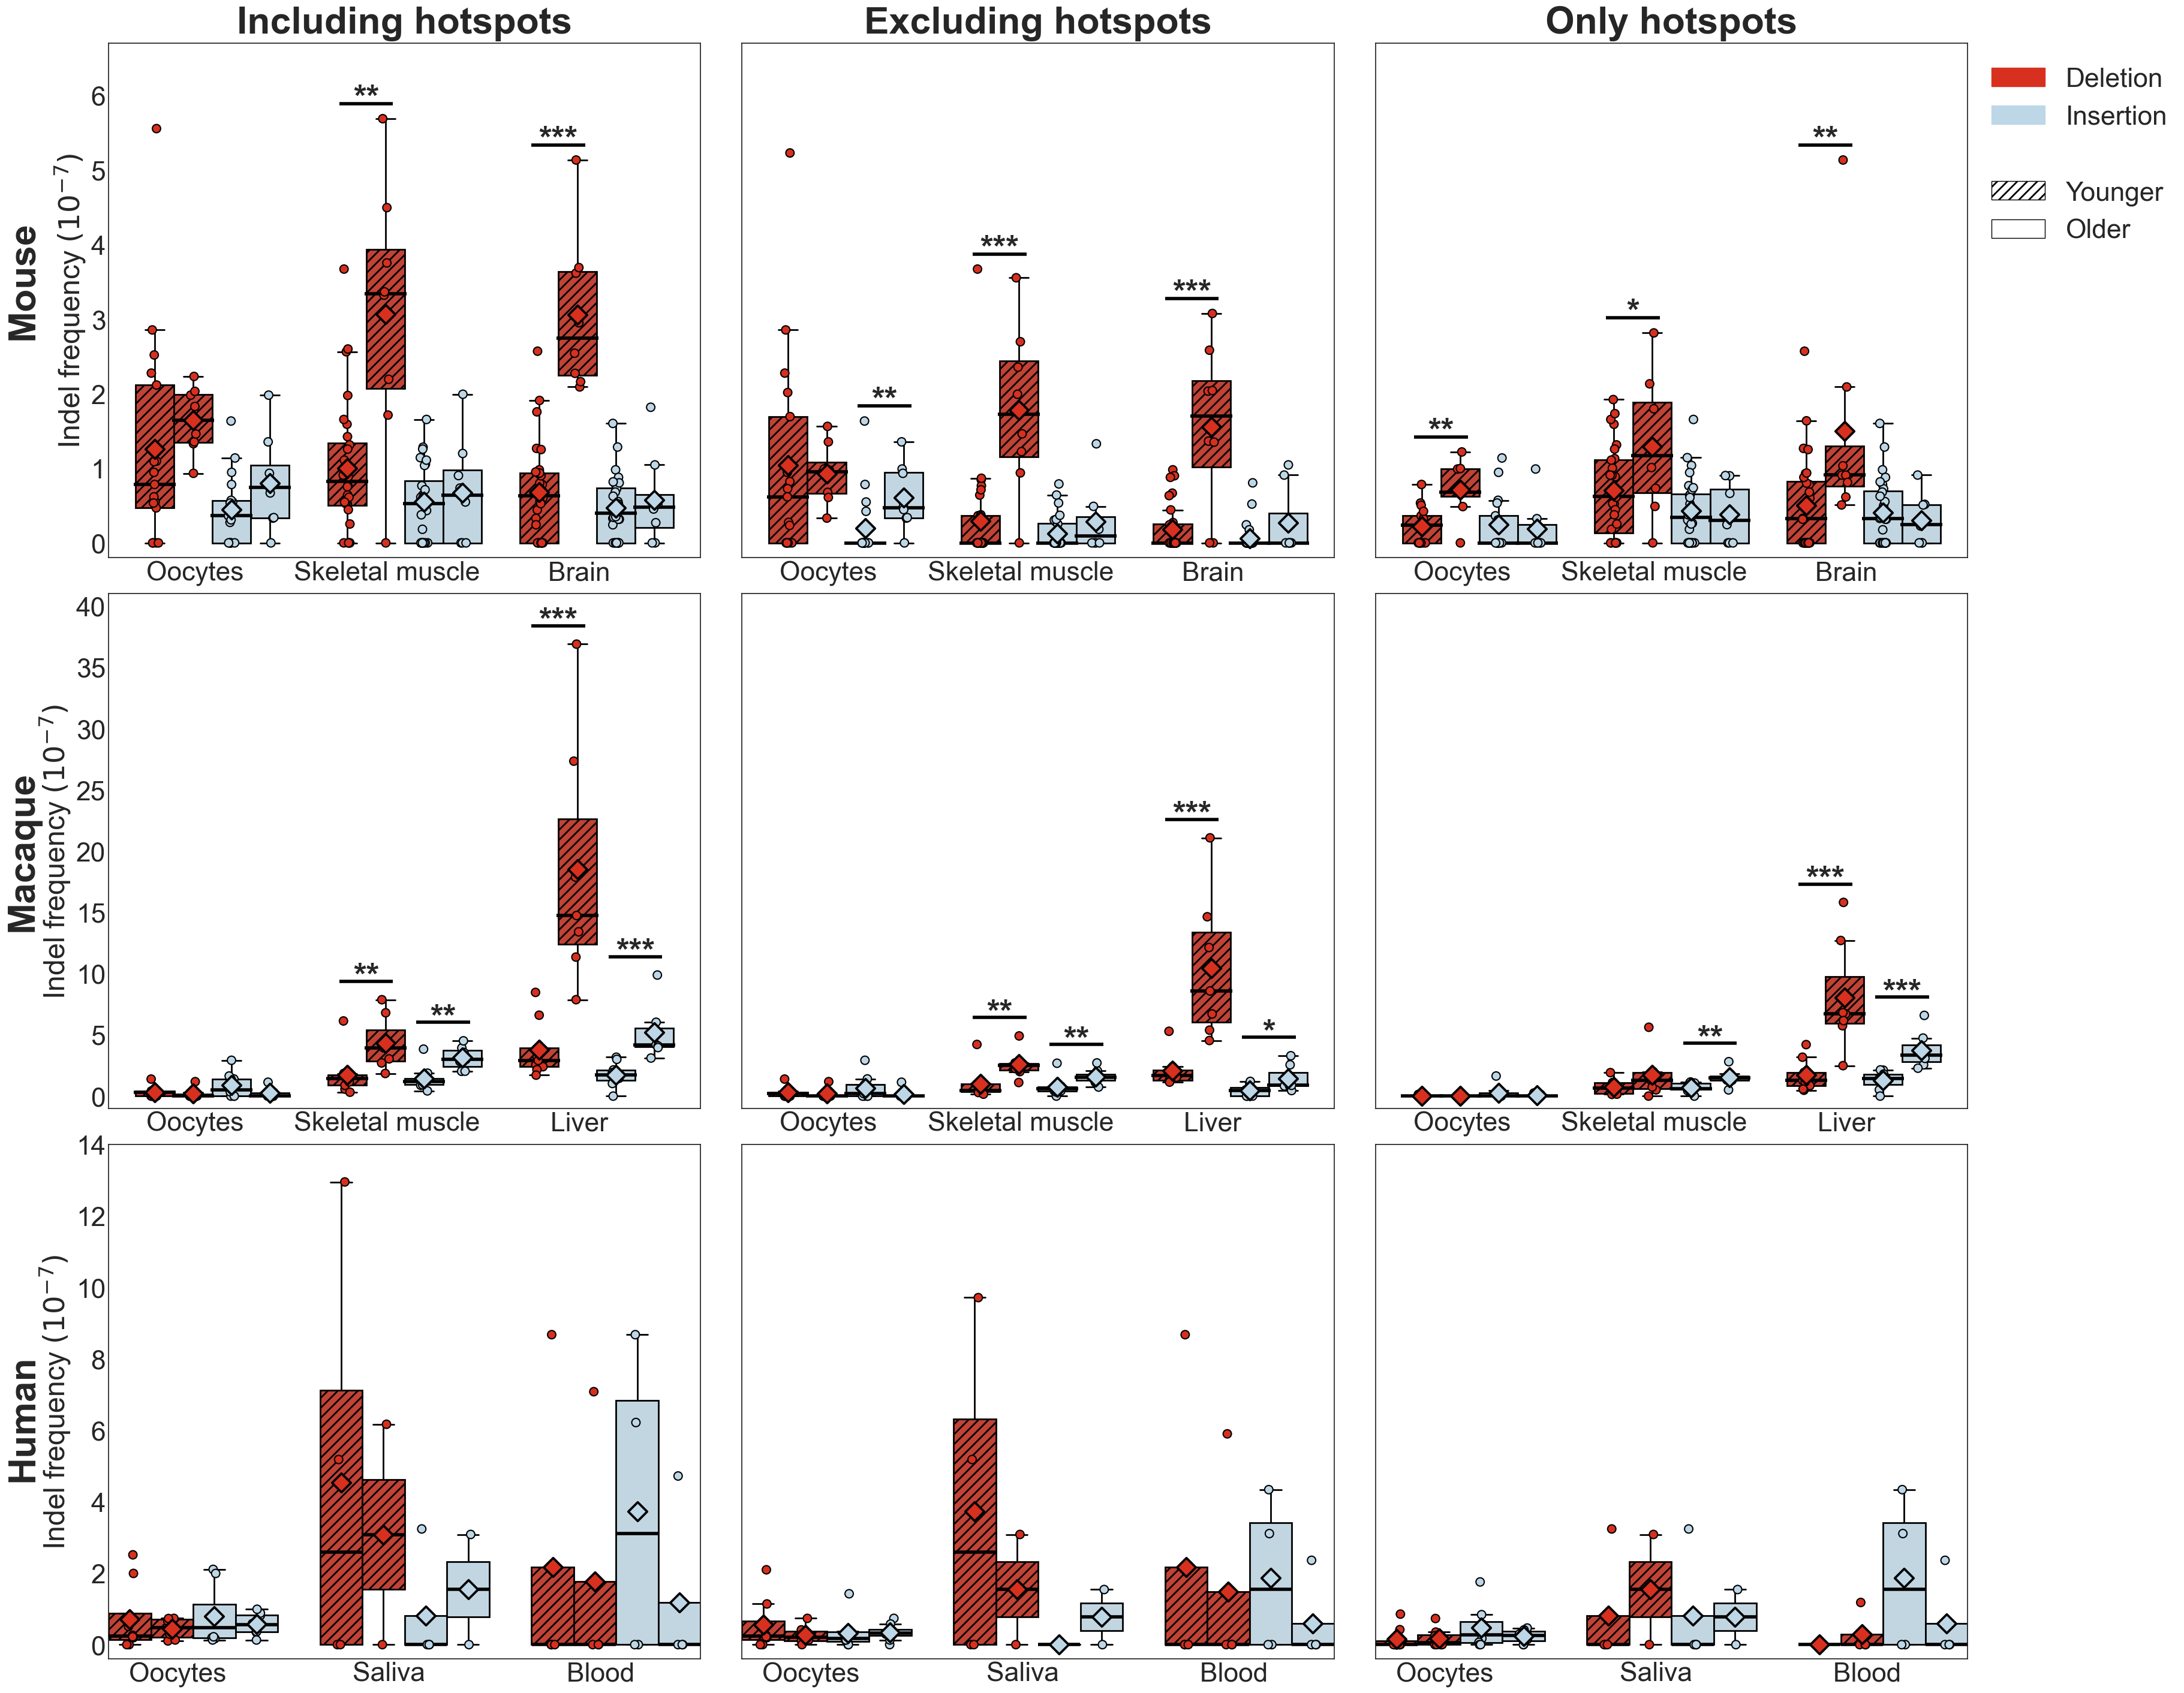

In [21]:
def plot_by_individual_paired_dels_ins_v4(write=True):
    list_species = ['mouse','macaque','human']
    list_filterVersions = [ 'including', 'excluding', 'only' ]

    # Text size (font size) and plot style.
    sns.set(font_scale=2.9)
    plt.style.use('seaborn-v0_8-white')
    #plt.style.use('ggplot')
    
    # Setting the dimensions of the plot.
    fig, axes = plt.subplots(3,3,figsize=(40,35),sharey=False)
    
    # Adjust space between subplots.
    fig.subplots_adjust(hspace = 0.07, wspace=0.07)

    for y,filter_version in enumerate(list_filterVersions):
        # Get indels.
        indels = get_indels(filter_version)
        list_dfs = []
        for mut_type in ['Deletion','Insertion']:
            mutations = indels[indels['Mutation_type']==mut_type]
            df_iter = get_indiv_freqs(mutations)
            df_iter['Mutation_type'] = mut_type
            list_dfs.append(df_iter)
        df_freqs = pd.concat(list_dfs)
        
        # Change power value of frequencies (Get rid of "1e10-7" in the plot).
        power_value = 7
        #power_value = abs(np.log10(max(df_freqs['Frequency'])).round())
        df_freqs['Frequency'] = df_freqs['Frequency'] * 10**power_value
        
        # Make label for plotting.
        df_freqs['Plot_label'] = df_freqs['Species'] +'_'+ df_freqs['Tissue'] +'_'+ df_freqs['Age_group'] +'_'+ df_freqs['Mutation_type'] 
        # Order each label.
        custom_order_mou = ['mouse_Oo_Younger_Deletion',
                            'mouse_Oo_Older_Deletion',
                            'mouse_Oo_Younger_Insertion',
                            'mouse_Oo_Older_Insertion',
                            '',
                            'mouse_M_Younger_Deletion',
                            'mouse_M_Older_Deletion',
                            'mouse_M_Younger_Insertion',
                            'mouse_M_Older_Insertion',
                            ' ',
                            'mouse_Br_Younger_Deletion',
                            'mouse_Br_Older_Deletion',
                            'mouse_Br_Younger_Insertion',
                            'mouse_Br_Older_Insertion']
                            
        custom_order_mac = ['macaque_Oo_Younger_Deletion',
                            'macaque_Oo_Older_Deletion',
                            'macaque_Oo_Younger_Insertion',
                            'macaque_Oo_Older_Insertion',
                            '',
                            'macaque_M_Younger_Deletion',
                            'macaque_M_Older_Deletion',
                            'macaque_M_Younger_Insertion',
                            'macaque_M_Older_Insertion',
                            ' ',
                            'macaque_Li_Younger_Deletion',
                            'macaque_Li_Older_Deletion',
                            'macaque_Li_Younger_Insertion',
                            'macaque_Li_Older_Insertion']
    
        custom_order_hum = ['human_Oo_Younger_Deletion',
                            'human_Oo_Older_Deletion',
                            'human_Oo_Younger_Insertion',
                            'human_Oo_Older_Insertion',
                            '',
                            'human_Sa_Younger_Deletion',
                            'human_Sa_Older_Deletion',
                            'human_Sa_Younger_Insertion',
                            'human_Sa_Older_Insertion',
                            ' ',
                            'human_Bl_Younger_Deletion',
                            'human_Bl_Older_Deletion',
                            'human_Bl_Younger_Insertion',
                            'human_Bl_Older_Insertion',]
        
        # Custom palette.
        custom_palette = ['#d7301f', '#d7301f','#bdd7e7','#bdd7e7',
                          '#FFFF',
                          '#d7301f', '#d7301f','#bdd7e7','#bdd7e7',
                          '#FFFF',
                          '#d7301f', '#d7301f','#bdd7e7','#bdd7e7'] #Alternating red and blue
        
        # Filter by species.
        def get_species(df,species):
            return df[df['Species']==species].reset_index(drop=True)
    
        # Exclude Intermediate groups for macaques.
        df_mac = get_species(df_freqs,"macaque")
        df_mac = df_mac.loc[~df_mac['Age_group'].str.contains('Interm')]
    
        # BOX PLOT.
        sns.boxplot( ax = axes[0,y], data = get_species(df_freqs,"mouse"), x = 'Plot_label', y = 'Frequency',
                    order = custom_order_mou, palette = custom_palette, width=1, linewidth=2, fliersize=0, gap=0.0, linecolor='black' ) 
        sns.boxplot( ax = axes[1,y], data = df_mac, x = 'Plot_label', y = 'Frequency',
                    order = custom_order_mac, palette = custom_palette, width=1, linewidth=2, fliersize=0, gap=0.0, linecolor='black'  ) 
        sns.boxplot( ax = axes[2,y], data = get_species(df_freqs,"human"), x = 'Plot_label', y = 'Frequency',
                    order = custom_order_hum, palette = custom_palette, width=1, linewidth=2, fliersize=0, gap=0.0, linecolor='black'  )
    
        # Add hatches (stripes) to boxplots.
        plt.rcParams['hatch.linewidth'] = 2.0
        for i in [0,1,2,3,4,5,6,7,8]:
            bars = fig.axes[i].patches
            hatches=['//','//',None,None,'//','//',None,None,'//','//',None,None]
            for pat,bar in zip(hatches,bars):
                bar.set_hatch(pat)

        # STRIP PLOT of median indel frequencies.
        marker_size = 50
        df_medians = pd.DataFrame(get_species(df_freqs,'mouse').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[0,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size, marker="_",
                      order = custom_order_mou, color = 'black' )
        df_medians = pd.DataFrame(get_species(df_freqs,'macaque').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[1,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size, marker="_",
                      order = custom_order_mac, color = 'black' )
        df_medians = pd.DataFrame(get_species(df_freqs,'human').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[2,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size, marker="_",
                      order = custom_order_hum, color = 'black' )
        
        # STRIP PLOT of individual frequencies.
        np.random.seed(123)
        dot_size = 10
        sns.stripplot( ax = axes[0,y], data = get_species(df_freqs,'mouse'), x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_mou, palette = custom_palette )
        sns.stripplot( ax = axes[1,y], data = df_mac, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_mac, palette = custom_palette )
        sns.stripplot( ax = axes[2,y], data = get_species(df_freqs,'human'), x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_hum, palette = custom_palette )
        
        # STRIP PLOT of mean indel frequencies.
        diamond_size = 16
        df_means = pd.DataFrame(get_species(df_freqs,'mouse').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[0,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                      order = custom_order_mou, palette = custom_palette )
        df_means = pd.DataFrame(get_species(df_freqs,'macaque').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[1,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                      order = custom_order_mac, palette = custom_palette )
        df_means = pd.DataFrame(get_species(df_freqs,'human').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[2,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                      order = custom_order_hum, palette = custom_palette )
        

        ### Add SIGNIFICANCE markers. ###
        results_test = get_table(filter_version)
        results_test['Plot_label'] = results_test['Species'] +'_'+ results_test['Tissue'] +'_'+ results_test['Age_group'] +'_'+ results_test['Mutation_type'] 
        orders = { 'mouse':custom_order_mou, 'macaque':custom_order_mac, 'human':custom_order_hum }
        for m,species in enumerate(['mouse','macaque','human']):
            custom_order = orders[species]
            timer = 0
            for n,label in enumerate(custom_order):
                
                if '_' not in label: # Skip if only spaces
                    timer = 0
                    continue
                elif timer == 1:
                    timer = 0
                    continue

                # Get results for the label
                iter = results_test[results_test['Plot_label']==label]
                # Get p-value.
                p_value = iter['P_value'].tolist()[0]
                # Assign stars by significance level
                if p_value < 0.001:
                    stars = "***"
                elif p_value < 0.01:
                    stars = "**"
                elif p_value < 0.05:
                    stars = "*"
                else:
                    timer = 1
                    continue  # Not significant (if p-value >= 0.05)

                # Find individual frequencies.
                young_values = df_freqs[df_freqs['Plot_label']==custom_order[n]]['Frequency']
                old_values = df_freqs[df_freqs['Plot_label']==custom_order[n+1]]['Frequency']

                line_y_int =  { 'mouse':0.2, 'macaque':1.5, 'human':1 }[species]
                # Stars.
                star_y_modifier = { 'mouse':0.15, 'macaque':1, 'human':0 }[species]
                axes[m,y].text(0.5+n, max(max(young_values), max(old_values)) + line_y_int - star_y_modifier, stars, fontweight='bold', 
                horizontalalignment='center', verticalalignment='bottom', fontsize=40)
                # Lines.
                axes[m,y].plot([n-0.2,n+1.2], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int ], color='black', lw=4, solid_capstyle='butt')

                # Succesful.
                timer +=1

    
        # Change y-limits to include space for stat brackets.
        #[ axes[i].set_ylim([-0.3,5.2]) for i in [0,1,2] ]

        # Row-specific ylim values
        row_ylims = {
            0: (-0.2, 6.7),
            1: (-1, 41 ),
            2: (-0.4, 14)
        }
        for i, row in enumerate(range(3)):
            for j, col in enumerate(range(3)):
                ax = axes[i, j]
                ax.set_ylim(row_ylims[i]) # set ylim
                if j > 0:
                    ax.set_ylabel("")  # Remove redundant y-axis labels for better clarity
                    ax.set_yticklabels([])
                    

        '''
        percentage_raise = 1.1
        axes[0].set_ylim([ axes[0].get_ylim()[0], axes[0].get_ylim()[1]*percentage_raise ])
        axes[1].set_ylim([ axes[1].get_ylim()[0], axes[1].get_ylim()[1]*percentage_raise ])
        axes[2].set_ylim([ axes[2].get_ylim()[0], axes[2].get_ylim()[1]*percentage_raise ])
        '''

        # Change axis labels.
        axes[0,y].set_xlabel('')
        axes[1,y].set_xlabel('')
        axes[2,y].set_xlabel('')
        
        # Change tick labels.
        list_ticklabels_mou = ['','','Oocytes          ','',
                           '',
                           '','','Skeletal muscle          ','',
                           '',
                           '','','Brain          ','']
        list_ticklabels_mac = ['','','Oocytes          ','',
                           '',
                           '','','Skeletal muscle          ','',
                           '',
                           '','','Liver          ','']
        list_ticklabels_hum = ['','','Oocytes          ','',
                           '',
                           '','','Saliva          ','',
                           '',
                           '','','Blood          ','']
                               
        [ axes[i,y].set_xticks(axes[i,y].get_xticks()) for i in [0,1,2] ]
        axes[0,y].set_xticklabels(list_ticklabels_mou, rotation=0)
        axes[1,y].set_xticklabels(list_ticklabels_mac, rotation=0)
        axes[2,y].set_xticklabels(list_ticklabels_hum, rotation=0)
        #plt.xticks(rotation=90)
        
        # t = 0.2
        # axes[0,0].plot(t,t,t,t, color='black', lw=4, solid_capstyle='butt')
        # axes[0,0].text(t,t,t, '**', fontweight='bold', 
        #     horizontalalignment='center', verticalalignment='bottom', fontsize=40)
        # return


    y=0
    axes[0,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
    axes[1,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
    axes[2,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)

    
    # Change legend.
    red_patch = mpatches.Patch(color='#d7301f', label='Deletion')
    blue_patch = mpatches.Patch(color='#bdd7e7', label='Insertion')
    blank_patch = mpatches.Patch(color='#FFFFFF', label='')
    slashed_patch = mpatches.Patch( label='Younger',edgecolor='#000000', facecolor='#FFFFFF', hatch='//',)
    white_patch = mpatches.Patch( label='Older',edgecolor='#000000', facecolor='#FFFFFF', hatch=None,)
    axes[0,2].legend(
        handles=[red_patch,blue_patch,blank_patch,slashed_patch,white_patch], 
        bbox_to_anchor=(1, 1)
        )
    
    # Change titles.
    title_size = 45
    axes[1,1].set_title( "Mouse\n", weight='bold', fontsize=title_size, y = 1.5, x = -1.17 - 0.01, rotation = 90)
    axes[1,0].set_title( "Macaque\n", weight='bold', fontsize=title_size, y = 0.35, x = -0.1 - 0.01, rotation = 90)
    axes[2,0].set_title( "Human\n", weight='bold', fontsize=title_size, y = 0.35, x = -0.1 - 0.01, rotation = 90)
    
    # Titles.
    axes[0,0].set_title( f'{list_filterVersions[0].capitalize()} hotspots' , weight='bold', fontsize=title_size, y = 1.01, rotation = 0)
    axes[0,1].set_title( f'{list_filterVersions[1].capitalize()} hotspots' , weight='bold', fontsize=title_size, y = 1.01, rotation = 0)
    axes[0,2].set_title( f'{list_filterVersions[2].capitalize()} hotspots' , weight='bold', fontsize=title_size, y = 1.01, rotation = 0)
    
    if write:
        # Export as vectorized image.
        fig.savefig( f'plots/pdf/figure3_freqBoxplots_ins_dels.pdf', bbox_inches='tight', format='pdf', dpi=600)
        fig.savefig( f'plots/png/figure3_freqBoxplots_ins_dels.png', bbox_inches='tight', format='png', dpi=600)



plot_by_individual_paired_dels_ins_v4()